In [26]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)


# 공통 모듈 임포트
import numpy as np
import pandas as pd
import os


# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    

from matplotlib import font_manager, rc
import platform


path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)


mpl.rcParams['axes.unicode_minus'] = False


# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한 
%precision 3


import seaborn as sns

import scipy as sp
from scipy import stats


# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"


# 노트북 실행 결과를 동일하게 유지하기 위해
# 데이터를 분할할 때 동일한 분할을 만들기 위해서
# 모델을 만드는 작업을 여러 번에 걸쳐서 하는 경우 시드가 변경되면
# 훈련용 데이터가 자주 변경되면 결국 모든 데터를 가지고 모델을 생성하는 결과
# Outfit을 만드는 효과를 가져옴.
np.random.seed(42)

In [27]:
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()

X_feature = dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data=X_feature, columns=dataset.feature_names)
cancer_df['target'] = y_label
print(cancer_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

# 데이터의 분포 확인

In [28]:
# 타겟 데이터의 분포 확인 - 이 비율이 한쪽으로 치우치면 가중치를 적용하거나 층화 추출을 고려해야 함.
print(cancer_df['target'].value_counts())

1    357
0    212
Name: target, dtype: int64


In [29]:
# 학습 데이터와 훈련 데이터 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_feature, y_label, test_size=0.1, random_state=42)

# (데이터 개수, column 개수)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(512, 30) (57, 30)
(512,) (57,)


## XGBoost를 이용하여 데이터 생성

In [30]:
import xgboost as xgb
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [31]:
params = {
    'max_depth': 3,
    'eta': 1,
    'objective':'binary:logistic',
    'eval_metric':'logloss'
}
num_rounds = 400

In [32]:
# 훈련 데이터와 검증 데이터 생성
wlist = [(dtrain, 'train'), (dtest, 'eval')]

# 모델 생성
xgb_model = xgb.train(params=params, dtrain=dtrain, evals=wlist, 
                      num_boost_round=num_rounds, early_stopping_rounds=100)
# early_stopping_rounds 조기종료 옵션

pred_probs = xgb_model.predict(dtest)
print(pred_probs[0:10])



[0]	train-logloss:0.19404	eval-logloss:0.24686
[1]	train-logloss:0.08964	eval-logloss:0.18027
[2]	train-logloss:0.05455	eval-logloss:0.15600
[3]	train-logloss:0.03359	eval-logloss:0.15126
[4]	train-logloss:0.02214	eval-logloss:0.14433
[5]	train-logloss:0.01720	eval-logloss:0.14218
[6]	train-logloss:0.01357	eval-logloss:0.13925
[7]	train-logloss:0.01134	eval-logloss:0.12533
[8]	train-logloss:0.00984	eval-logloss:0.11654
[9]	train-logloss:0.00908	eval-logloss:0.11707
[10]	train-logloss:0.00826	eval-logloss:0.12371
[11]	train-logloss:0.00741	eval-logloss:0.12267
[12]	train-logloss:0.00676	eval-logloss:0.13281
[13]	train-logloss:0.00648	eval-logloss:0.13872
[14]	train-logloss:0.00629	eval-logloss:0.14407
[15]	train-logloss:0.00608	eval-logloss:0.13830
[16]	train-logloss:0.00592	eval-logloss:0.13825
[17]	train-logloss:0.00575	eval-logloss:0.14187
[18]	train-logloss:0.00563	eval-logloss:0.14277
[19]	train-logloss:0.00549	eval-logloss:0.14746
[20]	train-logloss:0.00535	eval-logloss:0.14086
[2

In [33]:
# 확률을 가지고 실제 클래스를 예측
preds = [1 if x > 0.5 else 0 for x in pred_probs]
preds[:10]

[1, 0, 0, 1, 1, 0, 0, 0, 0, 1]

# 평가지표 확인

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score, f1_score, roc_auc_score

In [35]:
# 오차 행렬
confusion = confusion_matrix(y_test, preds)
print(confusion)

# 정확도
accuracy = accuracy_score(y_test, preds)
print(accuracy)

# 정밀도 - True로 판정한 것 중에서 실제 True인 비율 - 잘못 검색되면 안 되는 경우 중요
precision = precision_score(y_test, preds)
print(precision)

# 재현율 - 실제로 True 인 것 중에서 True로 판정한 비율 - 정보 검색에서 중요
recall = recall_score(y_test, preds)
print(recall)

# f1 score: 정밀도와 재현율의 조화 평균 - 데이터가 불균형할 때 중요
f1 = f1_score(y_test, preds)
print(f1)

# roc_auc: 확률을 매개변수로 넘겨줘야 함. 1에 가까울수록 좋음
roc_auc = roc_auc_score(y_test, pred_probs)
print(roc_auc)

[[16  1]
 [ 1 39]]
0.9649122807017544
0.975
0.975
0.975
0.9852941176470588


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

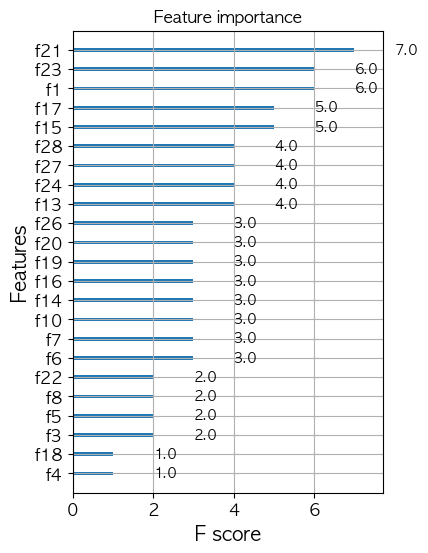

In [36]:
# 피처의 중요도 확인
from xgboost import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(4, 6))
plot_importance(xgb_model, ax=ax)